### Importing required libraries

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Exploring of dataset

In [10]:
#The train_images contains 60k images of 28 by 28 pixels.
print("Train Images: ", train_images.shape)
#The train_labels contains 60k labels for the training examples.
print("Train Labels: ", train_labels.shape)

#The test contains 10k images of 28 by 28 pixels.
print("Test Images: ", test_images.shape)
#The test_labels contains 10k labels for the test examples.
print("Test Labels: ", test_labels.shape)

Train Images:  (60000, 28, 28)
Train Labels:  (60000,)
Test Images:  (10000, 28, 28)
Test Labels:  (10000,)


In [11]:
#The labels range from 0-9
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
#Each digit in labels correspond to a class (respective of index)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Data preprocessing


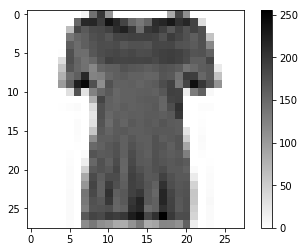

In [13]:
#It is visible that each pixel contains a value between 0-255
plt.figure()
plt.imshow(train_images[10], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

In [14]:
#Normalizing the data for faster convergence
train_images = train_images / 255.0
test_images = test_images / 255.0

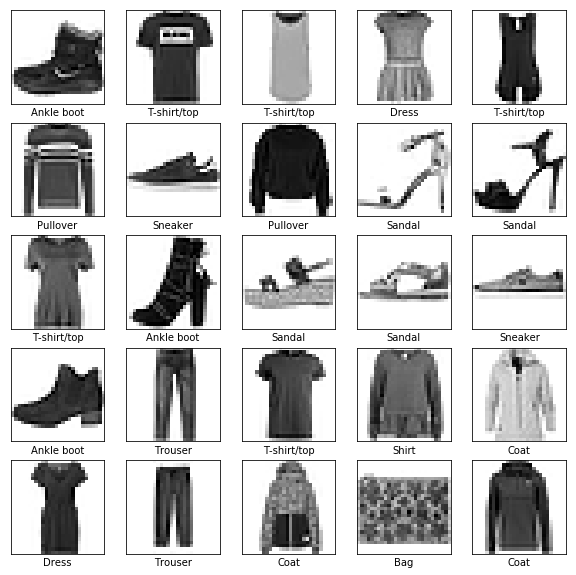

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

### Building the model


In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [17]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.4986 - acc: 0.8268
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.3756 - acc: 0.8655
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.3385 - acc: 0.8775
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.3126 - acc: 0.8854
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.2953 - acc: 0.8908
Epoch 6/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2804 - acc: 0.8959
Epoch 7/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.2665 - acc: 0.9015
Epoch 8/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.2571 - acc: 0.9034
Epoch 9/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.2482 - acc: 0.9071
Epoch 10/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.2378 - acc: 0.9112

In [19]:
predictions = model.predict(test_images)


In [20]:
predictions

array([[2.03900310e-08, 1.11957466e-08, 3.59888958e-07, ...,
        2.23898608e-02, 2.16482348e-07, 9.77153420e-01],
       [4.48264764e-05, 5.30376784e-12, 9.98300970e-01, ...,
        1.17064453e-17, 2.14054871e-10, 7.98075564e-11],
       [5.69638159e-09, 1.00000000e+00, 1.65011824e-11, ...,
        4.11067373e-20, 1.24409478e-12, 4.52571722e-17],
       ...,
       [3.67024302e-04, 8.38124237e-09, 4.23431775e-04, ...,
        1.08976067e-07, 9.93023872e-01, 1.03036969e-12],
       [2.76377961e-08, 9.99963522e-01, 1.11367671e-09, ...,
        1.65139621e-11, 1.82245830e-09, 3.69581754e-10],
       [5.32657141e-05, 7.12431785e-08, 4.54646542e-05, ...,
        9.63550340e-03, 2.51408055e-04, 8.09910925e-05]], dtype=float32)

In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

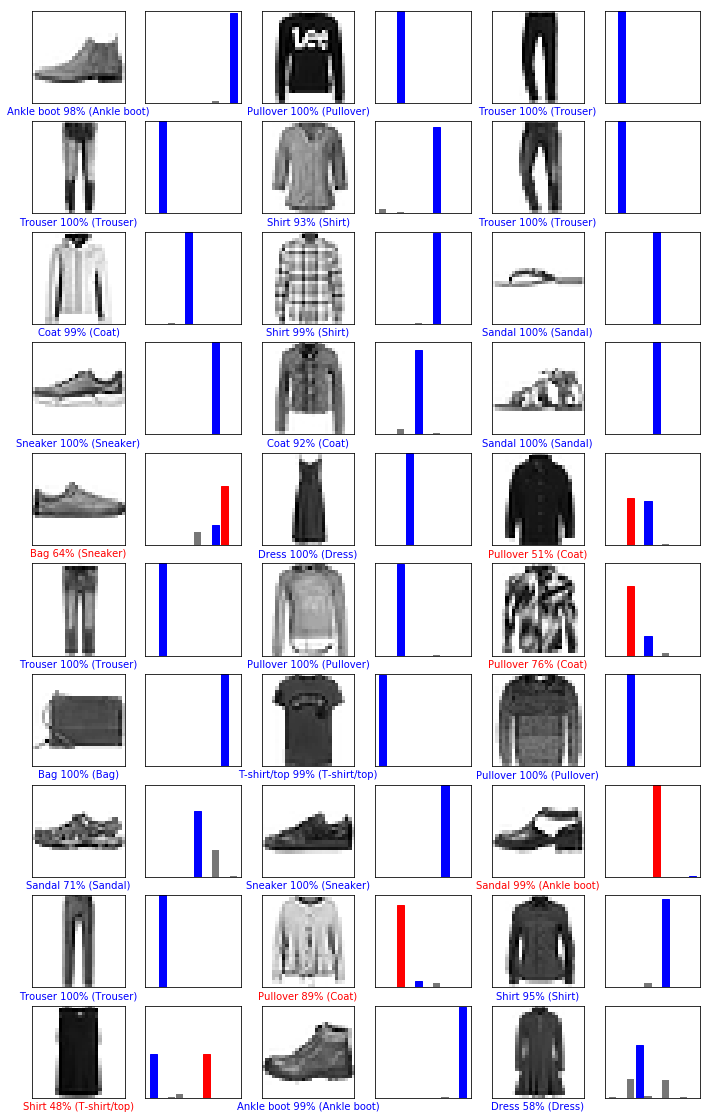

In [22]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)